In [6]:
import sys
import pandas as pd
import numpy as np
import nltk
nltk.download()
from nltk.book import *
from nltk import word_tokenize
from nltk.corpus import stopwords
import datetime
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [25.0, 15.0]
import re
import string 
import dateparser
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [2]:
with open('SectorSalud_R.txt') as f:
    SecS = f.read()

FileNotFoundError: [Errno 2] No such file or directory: 'SectorSalud_R.txt'

In [3]:
all_tokens = SecS.split()

In [4]:
print(SecS)

	text	retweet_count	favorite_count	created_at	
1	En la Academia Nacional de Medicina, el ministro @agaviriau participa en la ceremonia de posesión del doctor César… https://t.co/lhN2GgIdeB	1	3	Wed May 16 23:55:21 +0000 2018	
2	El ministro @agaviriau exalta el apoyo de @SoCientificas en la defensa de la vacunación contra el VPH y los impuest… https://t.co/UKVo6tR7TT	2	12	Wed May 16 23:42:16 +0000 2018	
3	La #LeyEstatutaria, #Mipres y la creación del @IETSColombia son un legado conjunto de @MinSaludCol y @SoCientificas… https://t.co/1gBgyXofrB	7	10	Wed May 16 23:37:45 +0000 2018	
4	Internet nos acerca y nos facilita la vida si lo usamos responsablemente. No cambies #MásTiempoEnFamilia por memes… https://t.co/Q0MdWWut7H	1	0	Wed May 16 23:00:56 +0000 2018	
5	Regalías aliviarán deudas de la salud. https://t.co/Nsm6HaUkLn https://t.co/br9kUcSDMJ	2	2	Wed May 16 22:40:07 +0000 2018	
6	#LogrosEnSalud Defensa de los derechos de la mujer y de la interrupción voluntaria del embarazo.… https://t.co

In [5]:
alpha = [w for w in all_tokens if w.isalpha()]
alpha

['text',
 'En',
 'la',
 'Academia',
 'Nacional',
 'de',
 'el',
 'ministro',
 'participa',
 'en',
 'la',
 'ceremonia',
 'de',
 'posesión',
 'del',
 'doctor',
 'Wed',
 'May',
 'El',
 'ministro',
 'exalta',
 'el',
 'apoyo',
 'de',
 'en',
 'la',
 'defensa',
 'de',
 'la',
 'vacunación',
 'contra',
 'el',
 'VPH',
 'y',
 'los',
 'Wed',
 'May',
 'La',
 'y',
 'la',
 'creación',
 'del',
 'son',
 'un',
 'legado',
 'conjunto',
 'de',
 'y',
 'Wed',
 'May',
 'Internet',
 'nos',
 'acerca',
 'y',
 'nos',
 'facilita',
 'la',
 'vida',
 'si',
 'lo',
 'usamos',
 'No',
 'cambies',
 'por',
 'Wed',
 'May',
 'Regalías',
 'aliviarán',
 'deudas',
 'de',
 'la',
 'Wed',
 'May',
 'Defensa',
 'de',
 'los',
 'derechos',
 'de',
 'la',
 'mujer',
 'y',
 'de',
 'la',
 'interrupción',
 'voluntaria',
 'del',
 'Wed',
 'May',
 'La',
 'vacunación',
 'es',
 'la',
 'mejor',
 'forma',
 'de',
 'prevenir',
 'enfermedades',
 'Wed',
 'May',
 'Siete',
 'recomendaciones',
 'para',
 'pacientes',
 'con',
 'Tómate',
 'la',
 'vida',
 'co

In [6]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
punctuation = string.punctuation + '–¡¿”“•\r´'
punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´'

In [8]:
def no_punct(string):
    transtable = string.maketrans('', '', punctuation)
    return string.translate(transtable)

In [9]:
tokens_no_punct = list(map(no_punct, all_tokens))
tokens_no_punct

['text',
 'retweetcount',
 'favoritecount',
 'createdat',
 '1',
 'En',
 'la',
 'Academia',
 'Nacional',
 'de',
 'Medicina',
 'el',
 'ministro',
 'agaviriau',
 'participa',
 'en',
 'la',
 'ceremonia',
 'de',
 'posesión',
 'del',
 'doctor',
 'César…',
 'httpstcolhN2GgIdeB',
 '1',
 '3',
 'Wed',
 'May',
 '16',
 '235521',
 '0000',
 '2018',
 '2',
 'El',
 'ministro',
 'agaviriau',
 'exalta',
 'el',
 'apoyo',
 'de',
 'SoCientificas',
 'en',
 'la',
 'defensa',
 'de',
 'la',
 'vacunación',
 'contra',
 'el',
 'VPH',
 'y',
 'los',
 'impuest…',
 'httpstcoUKVo6tR7TT',
 '2',
 '12',
 'Wed',
 'May',
 '16',
 '234216',
 '0000',
 '2018',
 '3',
 'La',
 'LeyEstatutaria',
 'Mipres',
 'y',
 'la',
 'creación',
 'del',
 'IETSColombia',
 'son',
 'un',
 'legado',
 'conjunto',
 'de',
 'MinSaludCol',
 'y',
 'SoCientificas…',
 'httpstco1gBgyXofrB',
 '7',
 '10',
 'Wed',
 'May',
 '16',
 '233745',
 '0000',
 '2018',
 '4',
 'Internet',
 'nos',
 'acerca',
 'y',
 'nos',
 'facilita',
 'la',
 'vida',
 'si',
 'lo',
 'usamos',

In [10]:
lower = [w.lower() for w in tokens_no_punct]
lower

['text',
 'retweetcount',
 'favoritecount',
 'createdat',
 '1',
 'en',
 'la',
 'academia',
 'nacional',
 'de',
 'medicina',
 'el',
 'ministro',
 'agaviriau',
 'participa',
 'en',
 'la',
 'ceremonia',
 'de',
 'posesión',
 'del',
 'doctor',
 'césar…',
 'httpstcolhn2ggideb',
 '1',
 '3',
 'wed',
 'may',
 '16',
 '235521',
 '0000',
 '2018',
 '2',
 'el',
 'ministro',
 'agaviriau',
 'exalta',
 'el',
 'apoyo',
 'de',
 'socientificas',
 'en',
 'la',
 'defensa',
 'de',
 'la',
 'vacunación',
 'contra',
 'el',
 'vph',
 'y',
 'los',
 'impuest…',
 'httpstcoukvo6tr7tt',
 '2',
 '12',
 'wed',
 'may',
 '16',
 '234216',
 '0000',
 '2018',
 '3',
 'la',
 'leyestatutaria',
 'mipres',
 'y',
 'la',
 'creación',
 'del',
 'ietscolombia',
 'son',
 'un',
 'legado',
 'conjunto',
 'de',
 'minsaludcol',
 'y',
 'socientificas…',
 'httpstco1gbgyxofrb',
 '7',
 '10',
 'wed',
 'may',
 '16',
 '233745',
 '0000',
 '2018',
 '4',
 'internet',
 'nos',
 'acerca',
 'y',
 'nos',
 'facilita',
 'la',
 'vida',
 'si',
 'lo',
 'usamos',

In [11]:
alpha = [w for w in lower if not w.isdigit()]
alpha

['text',
 'retweetcount',
 'favoritecount',
 'createdat',
 'en',
 'la',
 'academia',
 'nacional',
 'de',
 'medicina',
 'el',
 'ministro',
 'agaviriau',
 'participa',
 'en',
 'la',
 'ceremonia',
 'de',
 'posesión',
 'del',
 'doctor',
 'césar…',
 'httpstcolhn2ggideb',
 'wed',
 'may',
 'el',
 'ministro',
 'agaviriau',
 'exalta',
 'el',
 'apoyo',
 'de',
 'socientificas',
 'en',
 'la',
 'defensa',
 'de',
 'la',
 'vacunación',
 'contra',
 'el',
 'vph',
 'y',
 'los',
 'impuest…',
 'httpstcoukvo6tr7tt',
 'wed',
 'may',
 'la',
 'leyestatutaria',
 'mipres',
 'y',
 'la',
 'creación',
 'del',
 'ietscolombia',
 'son',
 'un',
 'legado',
 'conjunto',
 'de',
 'minsaludcol',
 'y',
 'socientificas…',
 'httpstco1gbgyxofrb',
 'wed',
 'may',
 'internet',
 'nos',
 'acerca',
 'y',
 'nos',
 'facilita',
 'la',
 'vida',
 'si',
 'lo',
 'usamos',
 'responsablemente',
 'no',
 'cambies',
 'mástiempoenfamilia',
 'por',
 'memes…',
 'httpstcoq0mdwwut7h',
 'wed',
 'may',
 'regalías',
 'aliviarán',
 'deudas',
 'de',
 'l

In [12]:
len(alpha)

59030

In [13]:
len(set(alpha))

6418

In [14]:
freqdist = nltk.FreqDist(alpha)
freqdist

FreqDist({'de': 3744, 'la': 2037, 'en': 1607, 'el': 1575, 'y': 1438, 'apr': 945, 'mar': 876, 'a': 780, 'los': 741, 'feb': 716, ...})

In [15]:
freqdist.most_common()

[('de', 3744),
 ('la', 2037),
 ('en', 1607),
 ('el', 1575),
 ('y', 1438),
 ('apr', 945),
 ('mar', 876),
 ('a', 780),
 ('los', 741),
 ('feb', 716),
 ('para', 695),
 ('que', 677),
 ('wed', 619),
 ('del', 601),
 ('con', 576),
 ('tue', 575),
 ('salud', 563),
 ('las', 552),
 ('mon', 552),
 ('thu', 551),
 ('fri', 523),
 ('es', 517),
 ('may', 476),
 ('rt', 448),
 ('se', 396),
 ('un', 373),
 ('por', 367),
 ('al', 306),
 ('una', 288),
 ('agaviriau', 285),
 ('más', 244),
 ('no', 214),
 ('su', 194),
 ('o', 194),
 ('sat', 192),
 ('son', 186),
 ('', 174),
 ('vacunación', 160),
 ('enfermedades', 158),
 ('colombia', 158),
 ('minsaludcol', 150),
 ('vida', 149),
 ('sobre', 149),
 ('riesgo', 147),
 ('sistema', 138),
 ('ministro', 136),
 ('atención', 126),
 ('manera', 124),
 ('servicios', 122),
 ('como', 120),
 ('enfermedadesrespiratorias', 120),
 ('enfermedad', 116),
 ('minsalud', 110),
 ('niños', 108),
 ('sus', 106),
 ('cáncer', 106),
 ('contra', 105),
 ('sun', 103),
 ('jan', 103),
 ('reducir', 100),
 

In [16]:
from nltk.corpus import stopwords
# Grab stopwords in Spanish
stopwords_esp = stopwords.words('spanish')
stopwords_esp

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosostros',
 'vosostras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestr

In [17]:
tokens_no_stop = [w for w in alpha if w not in stopwords_esp]
tokens_no_stop

['text',
 'retweetcount',
 'favoritecount',
 'createdat',
 'academia',
 'nacional',
 'medicina',
 'ministro',
 'agaviriau',
 'participa',
 'ceremonia',
 'posesión',
 'doctor',
 'césar…',
 'httpstcolhn2ggideb',
 'wed',
 'may',
 'ministro',
 'agaviriau',
 'exalta',
 'apoyo',
 'socientificas',
 'defensa',
 'vacunación',
 'vph',
 'impuest…',
 'httpstcoukvo6tr7tt',
 'wed',
 'may',
 'leyestatutaria',
 'mipres',
 'creación',
 'ietscolombia',
 'legado',
 'conjunto',
 'minsaludcol',
 'socientificas…',
 'httpstco1gbgyxofrb',
 'wed',
 'may',
 'internet',
 'acerca',
 'facilita',
 'vida',
 'si',
 'usamos',
 'responsablemente',
 'cambies',
 'mástiempoenfamilia',
 'memes…',
 'httpstcoq0mdwwut7h',
 'wed',
 'may',
 'regalías',
 'aliviarán',
 'deudas',
 'salud',
 'httpstconsm6haukln',
 'httpstcobr9kucsdmj',
 'wed',
 'may',
 'logrosensalud',
 'defensa',
 'derechos',
 'mujer',
 'interrupción',
 'voluntaria',
 'embarazo…',
 'httpstcohj5rwg0pco',
 'wed',
 'may',
 'vacunación',
 'mejor',
 'forma',
 'prevenir

In [18]:
freqdist = nltk.FreqDist(tokens_no_stop)
freqdist.most_common()

[('apr', 945),
 ('mar', 876),
 ('feb', 716),
 ('wed', 619),
 ('tue', 575),
 ('salud', 563),
 ('mon', 552),
 ('thu', 551),
 ('fri', 523),
 ('may', 476),
 ('rt', 448),
 ('agaviriau', 285),
 ('sat', 192),
 ('', 174),
 ('vacunación', 160),
 ('enfermedades', 158),
 ('colombia', 158),
 ('minsaludcol', 150),
 ('vida', 149),
 ('riesgo', 147),
 ('sistema', 138),
 ('ministro', 136),
 ('atención', 126),
 ('manera', 124),
 ('servicios', 122),
 ('enfermedadesrespiratorias', 120),
 ('enfermedad', 116),
 ('minsalud', 110),
 ('niños', 108),
 ('cáncer', 106),
 ('sun', 103),
 ('jan', 103),
 ('reducir', 100),
 ('temporadadelluvias', 98),
 ('evite', 97),
 ('prevenir', 94),
 ('personas', 93),
 ('marzo', 93),
 ('ser', 85),
 ('medicamentos', 84),
 ('inscolombia', 83),
 ('cinco', 83),
 ('consumo', 83),
 ('agua', 82),
 ('cuenta', 77),
 ('menores', 75),
 ('hoy', 75),
 ('día', 74),
 ('cambios', 74),
 ('pueden', 73),
 ('nacional', 72),
 ('eps', 69),
 ('social', 69),
 ('nueva', 68),
 ('si', 66),
 ('integral', 66),

In [19]:
not_of_interest = ['','si','usamos','responsablemente','apoyo','página','ministro', 'httpstconsm6haukln','httpstcobr9kucsdmj', 'doctor','creación','césar…','mmv','así','zvtn','da','acciones','objeto','priorizando','servicios','da','ley','artículo','presente', 'ceremonia','exalta','httpstcoukvo6tr7tt','legado','posesión','httpstcolhn2ggideb','httpstcolhn2ggideb','participa','createdat','text','retweetcount','1°','favoritecount','colombiana','apr','nacional','mar','feb','wed','tue', 'salud', 'mon', 'thu', 'fri','may', 'rt', 'agaviriau','sat']

In [20]:
tokens_of_interest = [w for w in tokens_no_stop if w not in not_of_interest]
tokens_of_interest

['academia',
 'medicina',
 'socientificas',
 'defensa',
 'vacunación',
 'vph',
 'impuest…',
 'leyestatutaria',
 'mipres',
 'ietscolombia',
 'conjunto',
 'minsaludcol',
 'socientificas…',
 'httpstco1gbgyxofrb',
 'internet',
 'acerca',
 'facilita',
 'vida',
 'cambies',
 'mástiempoenfamilia',
 'memes…',
 'httpstcoq0mdwwut7h',
 'regalías',
 'aliviarán',
 'deudas',
 'logrosensalud',
 'defensa',
 'derechos',
 'mujer',
 'interrupción',
 'voluntaria',
 'embarazo…',
 'httpstcohj5rwg0pco',
 'vacunación',
 'mejor',
 'forma',
 'prevenir',
 'enfermedades',
 'graves',
 'refuerzatusdefensas',
 'httpstcoaatjvgqast',
 'httpstcoozw5qqywil',
 'siete',
 'recomendaciones',
 'pacientes',
 'asma',
 'controlaelasma',
 'httpstcoey9bmtqi1q',
 'tómate',
 'vida',
 'segun…',
 'httpstcoxvgqyhqt9x',
 'sexting',
 'juego',
 'actividad',
 'puede',
 'terminar',
 'abusos',
 'explotación',
 'sexual',
 'niños',
 'niñas',
 'ado…',
 'httpstcoifmcps5kng',
 'sarampión',
 'enfermedad',
 'causada',
 'virus',
 'contagiosa',
 'u20

In [21]:
tokens_nltk = nltk.Text(tokens_of_interest)
tokens_nltk

<Text: academia medicina socientificas defensa vacunación vph impuest… leyestatutaria...>

In [22]:
SecS_nltk = nltk.Text(SecS.split())
SecS_nltk

<Text: text retweet_count favorite_count created_at 1 En la Academia...>

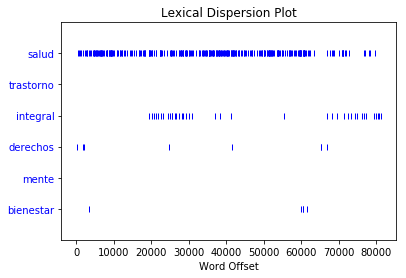

In [27]:
SecS_nltk.dispersion_plot(["salud","trastorno","integral","derechos","mente","bienestar"])

In [25]:
MinS_nltk.concordance('mente', lines=41)

No matches


In [24]:
MinS_nltk.concordance('psicología', lines=300)

No matches
